##### Data-Mining the Audio of Oral History - TECHNE workshop Mar 2017

# 2. Digital Audio Introduction

In this workbook we will explore the basics in the theory and practice of working with digital audio - hold on tight.
Work in pairs and talk through each section - if you dont understand anything, do not hesitate to ask. You *dont* need to understand all the maths, but to get a general feel for how things are working.

Practical tools you will learn include:
+ Reading and loading audio files
+ Playing audio
+ Visualising audio

Ideas you will learn about include:
+ Time domain vs frequency domain representations of audio
+ Spectrograms
+ Audio as numbers
+ Numbers as audio
+ Sampling rate


First we need to load up the tools that we need for audio analysis. We are using two main libraries for handling and playing audio: **IPython.display.Audio** and **librosa**

IPython.display.Audio lets you play audio directly in an IPython notebook.

[librosa](http://bmcfee.github.io/librosa/) is a Python package for music and audio processing by Brian McFee. 

* [Documentation Home](http://bmcfee.github.io/librosa/)
* [Demo: Getting Started](http://nbviewer.ipython.org/github/bmcfee/librosa/blob/master/examples/LibROSA%20demo.ipynb)
* [librosa on Github](librosa on Github)

[scipy](https://www.scipy.org/) is a Python-based ecosystem of open-source software for mathematics, science, and engineering.


In [2]:
# import these libraries so we can access their methods
import librosa, scipy

# We are going to make lots of plots - this ensures out plots appear in the current notebook, not in a new one
%pylab inline 

# and this sets a default size (width, height) for the figures we will plot
figsize(26,5) 

#NB: like any cell, you need to run this to ensure the libraries are loaded - 

Populating the interactive namespace from numpy and matplotlib


## Reading and loading audio files

We need to tell python where the audio file we wish to read is, so first we save the path in a *variable*. This acts like a short hand so we dont have to keep typing the full path. When we declare a variable (simply by using it), a piece of memory is reserved to store values in. In this case, we store a file path. We can then use that variable to refer to the path, without having to type it out again. If we store numbers in a variable, we can update the values (they can vary!) and still use the variable name to refer to it.

We can make up any variable names we like, tho if they go green, it means its already in use by python, so change it.

In [10]:
audioFile = "../Maurice_extract_10.wav"

# "audioFile" is a variable in which we store the path to the files we want to work with
# we can load any number of files, as long as we store them in different *variables*

Then we load up a file using the librosa method "*load*"

We can choose how long and which point in the file with the *offset* and *duration* arguments (in seconds).

When we load this function it returns two things -- the audio data contained in the audio file and the *sampling rate*.
These are then saved into the variables.

In [11]:
# load 30 seconds of audio from the given file 
a, srA = librosa.load(audioFile, offset=0, duration=30)

so variable *a* now contains the **audio data** (list of numbers which represents it) and *srA* now contains the **Sample Rate** 

The sample rate is the number of samples made per second. Remember digital audio is not continuous, but a numerical representation of the analogue audio signal. The less samples per second we have the lower range of frequencies we can represent. CD quality audio is 44100 sample per second. Librosa automatically samples at 22050 when we use the load function. 

Let's check this.

If we type a variable name at the end of a block, the value is printed out when we run it.

Type the variable name which the sample rate is stored in:

In [12]:
srA

22050

Let's check that we have the expected number of samples stored in our varible, *a*:
We can call the method shape() on *a* to tell us what "shape" it is. 

In [13]:
a.shape

(661500,)

Notice that there is just one number, followed by a comma, as if there might be a list of numbers. Python *variables* can contain a *list* of numbers (or letters or ..). To access these, we use square brackets [] with an index number in, to specify which element in the list we want to read. In Python, we start counting at 0. So we can access just the value, without the full list like this:


In [14]:
a.shape[0]

661500

We now know that there are 22050 samples per second, and we have 661500 samples, so we can work out how long our sample is in seconds: 

In [15]:
# divide this by the sample rate to give the length in seconds
a.shape[0]/ srA


30

When we carry out audio analyses later on, you will see that sometimes the length is given in seconds, and sometimes in samples. But now you know how to convert from one to the other, it won't be at all confusing ... 

**Q1:**
- Re-run the load function above so that 3 mins of audio are loaded (3 mins = 3 * 60 secs)
- Check the number of samples add up

Note that loading this audio takes a little time - whilst a cell is evaluating, the text on the left says "In [*]" . When the computation completes, it displays the number of the nth operation carried out. Always wait for a cell to complete before moving on to the next one ... ie until it says "In [3]" etc.

## Playing Audio Files

Using [IPython.display.Audio](http://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html#IPython.lib.display.Audio), we can play a local audio file or a remote audio file:


In [16]:
# first we import the library so that we can access it's handy functions
from IPython.display import Audio

# then we can all the Audio() function and listen to our sample
Audio(data = a, rate = srA)


## Visualizing Audio
### Time domain
We can view an audio file using plot().

Time runs across the bottom (x-axis) in samples, the y-axis represents the amplitude of the sound wave. This relates to how loud we hear it and could describe changes in sound pressure levels as it travels through the air, or fluctations in voltage as it is transduced via a microphone to an amplifier ... 

We call this *time domain* as it shows us how the sound changes over time.

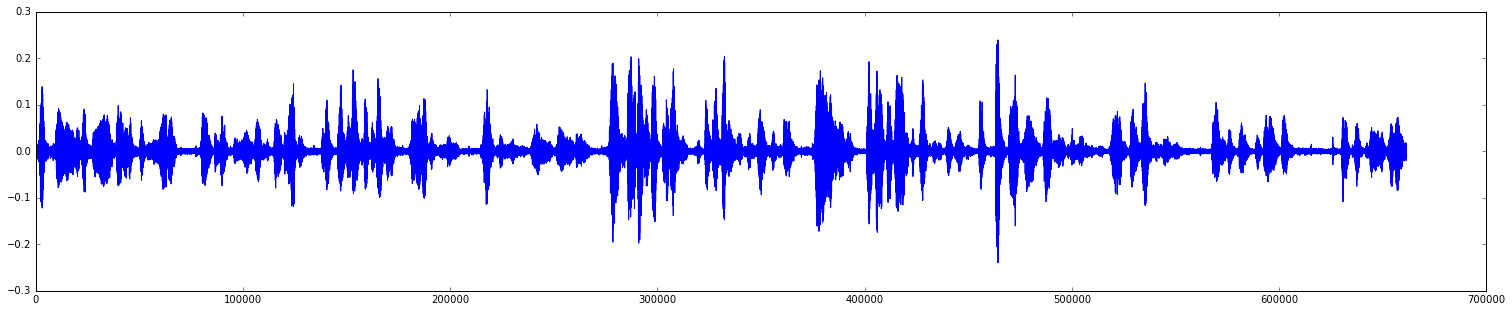

In [18]:
plot(a)

### Zooming  
We can zoom in to specific areas using the [x:y] notation which means plot "from sample x to sample y"

Try changing the values to view different parts of the waveform

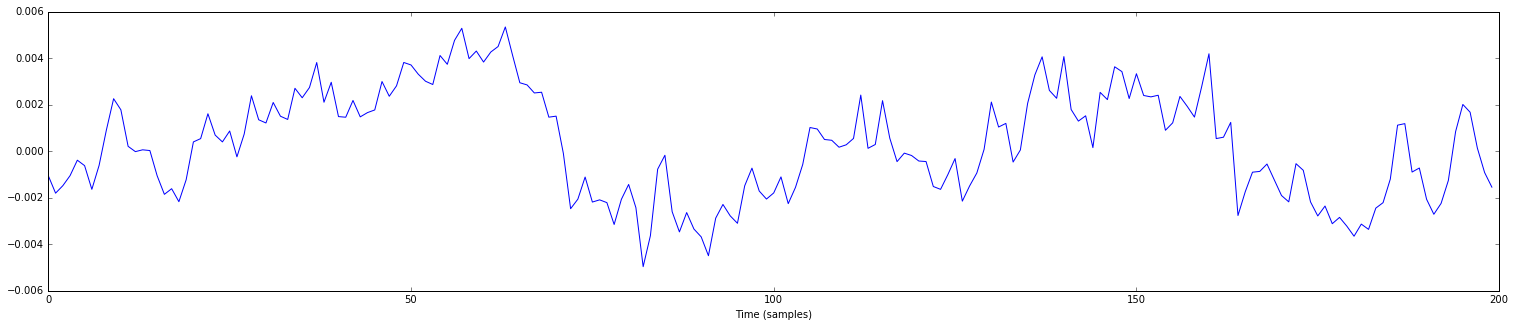

In [19]:
# specify the range in samples - so this is the first 200 samples
plot(a[0:200])

# and we can add a label so we (and others) know what it represents
xlabel('Time (samples)')

**Q**: How would you view 1 second of the sample, specified in terms of the sample rate? Try plotting it


# Normalising

When we deal with an archive with recordings of different origins, they are likely to be all different volumes (loudness levels). This can cause a problem when we come to compare them using automatic methods later. 

We can get around this by first *normalising* the audio. This just means adjusting the amplitude (which we hear as volume) so that everything is in the same range, between -1 and 1 -- just like "sound check" on iTunes

Let's normalise this audio, then replot it:


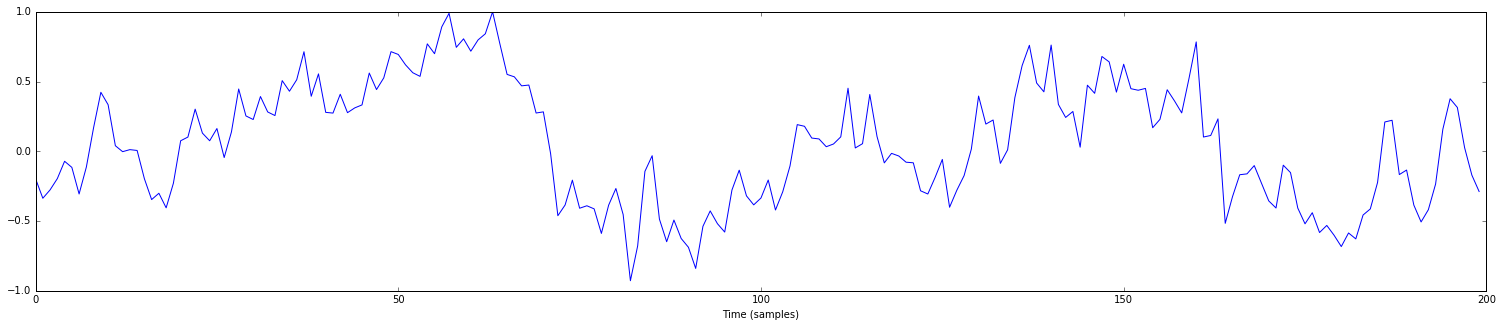

In [21]:
aNorm = librosa.util.normalize(a[0:200])
plot(aNorm[0:200])
xlabel('Time (samples)')

Compare the y-axes of the two plots above - notice that our values are now in the range -1.0 - 1.0

Let's normalise the whole file now, and look only at the first 200 samples. What do you notice about the range? Why?

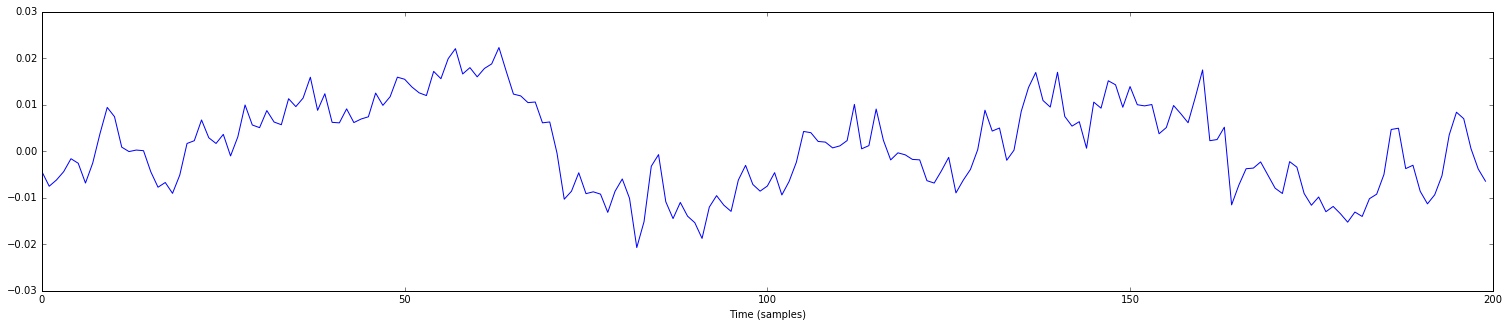

In [22]:
a = librosa.util.normalize(a)
plot(a[0:200])
xlabel('Time (samples)')

Because we are plotting just the start of the file which is quiet, python automatically zooms in for us ... we can choose our range if we want to

## Frequency Domain 

We have looked at the wave form as it varies in energy over time, but sometimes it is also useful to see how the energy varies across different frequncies -- is it really bass heavy, or does it have lots of treble etc.  We call this *frequency domain* 

We can transform the time-domain signal into the frequency domain by applying a **Fourier Transform**

This is one of the most fundamental operations in applied mathematics and signal processing, but we aren't going to go into the maths of it here! It is all taken care of in the scipy library we loaded up at the start.

Whereas the time domain expresses our signal as a sequence of samples, the frequency domain expresses our signal as a collection of sinusoids of varying magnitudes, frequencies, and phase offsets. This tells us how the overall energy is spread out across different frequencies  -  a little like what the flashy lights on your EQ on your home/ car stereo show. 

To compute a Fourier transform in NumPy or SciPy, we use **scipy.fft**


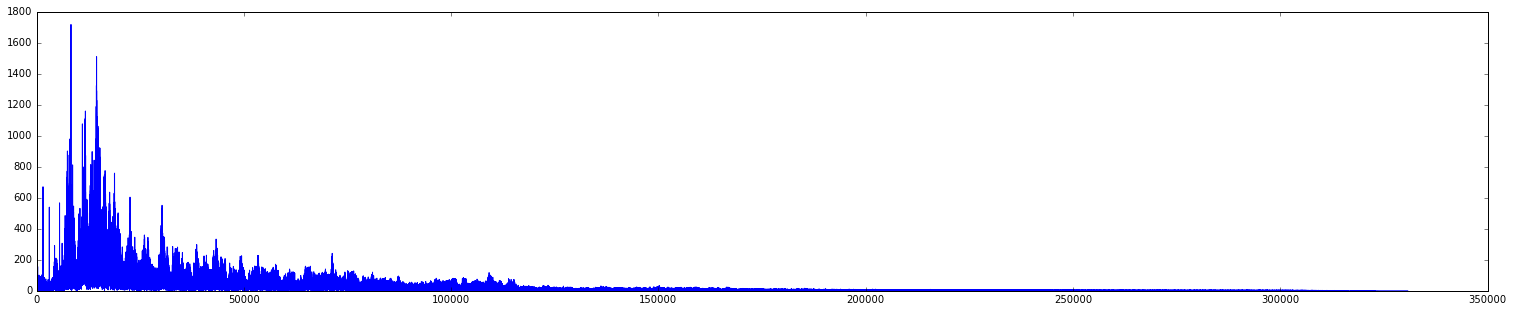

In [29]:
# computes the energy in each frequency band for the whole file

X = scipy.fft(a)
X_mag = numpy.absolute(X)
plt.plot(X_mag[0:X_mag.shape[0]/2]) # magnitude spectrum - the fft produces a mirrored image, so we chop it in half
?numpy.absolute(X)

We can see most of the energy is focused in the lower end of the spectrum 
Here frequency is along the bottom - with bass sounds on the left and treble to the right. 
The height (y-axis) tells us the relative magnitude -- how much energy there is in each frequency band

Let's zoom in a bit:

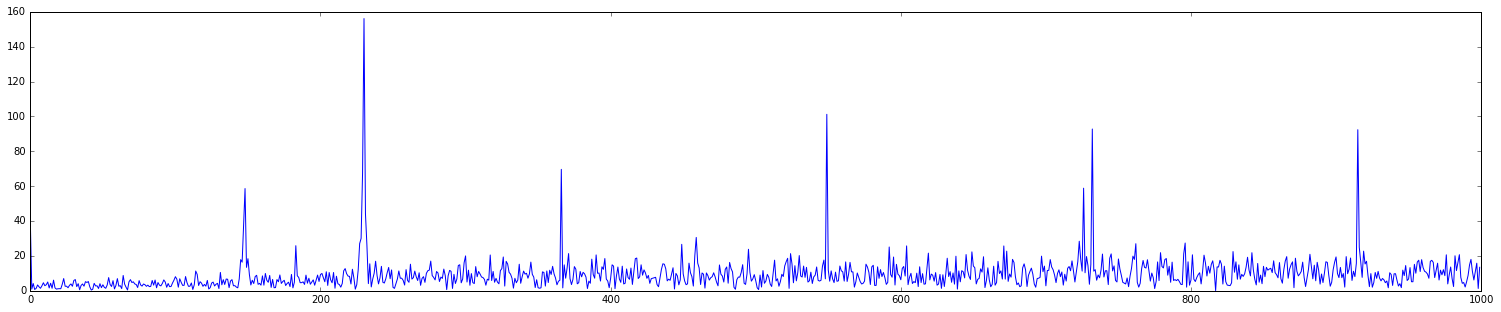

In [25]:
plt.plot(X_mag[:1000])
plt.xlabel('Time (seconds)')
plt.ylabel('Magnitude')

Notice how there are spikes at regular intervals -- this is what makes a human voice sound harmonic (rather than noisy)

## Spectrograms

Both spoken voice and music are transient, that is they change quickly over time. So it makes little sense to calculate information about frequency content over long files. 
Instead, we carry out calculations over short time frames. These can then be put together to make a 3D representation showing the changes in energy per frequency, over time. This is called a **spectrogram** and can be thought of as a 'heat map'. Time here is in seconds along the bottom (x-axis) and frequency increases with height (y-axis). Darker red corresponds to higher amplitude sound. This enables us to "see" the sound quite readily

The regular spikes we saw about can now be seen as these bands or stripes in the signal


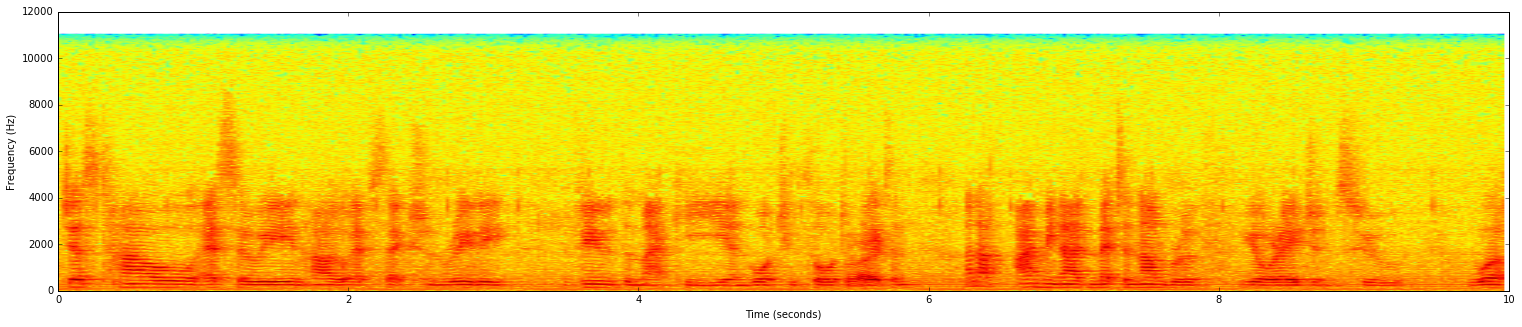

In [39]:
S, freqs, bins, im = plt.specgram(a[0:srA*10], NFFT=1024, noverlap=512, Fs=srA)
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')



## Digital Audio as Numbers
So far we have visualised the audio files by plotting, but let's look at the data itself.
Let's look at the first 3 samples of our audio file - remember our array notation?

In [40]:
a[0:3]

# an array is a list of numbers

array([-0.00438896, -0.00751114, -0.00617125], dtype=float32)

## Numbers as Digital Audio
Understanding how sound is represented as lists of numbers will help us later on .. let's make a wave form from some numbers:

In [32]:
# don't worry about the maths to much - we are making a very short sample, then creating a sine wave 

T = 0.01    # time in seconds
sr = 44100   # sampling rate
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = numpy.sin(2*numpy.pi*3000*t) # we can make a sine wave using a trigonometry function 

# This should create a sine wave (a noise!) at 3000Hz which should look at sound nice and smooth

Plot it in the time domain:

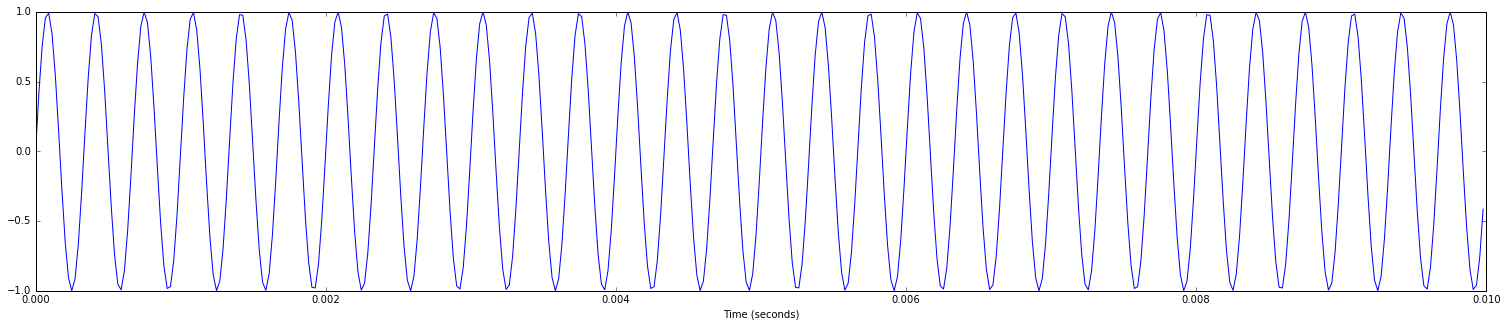

In [33]:
# Plot a sine wave 
plot(t, x)
plt.xlabel('Time (seconds)')


and in the frequency domain

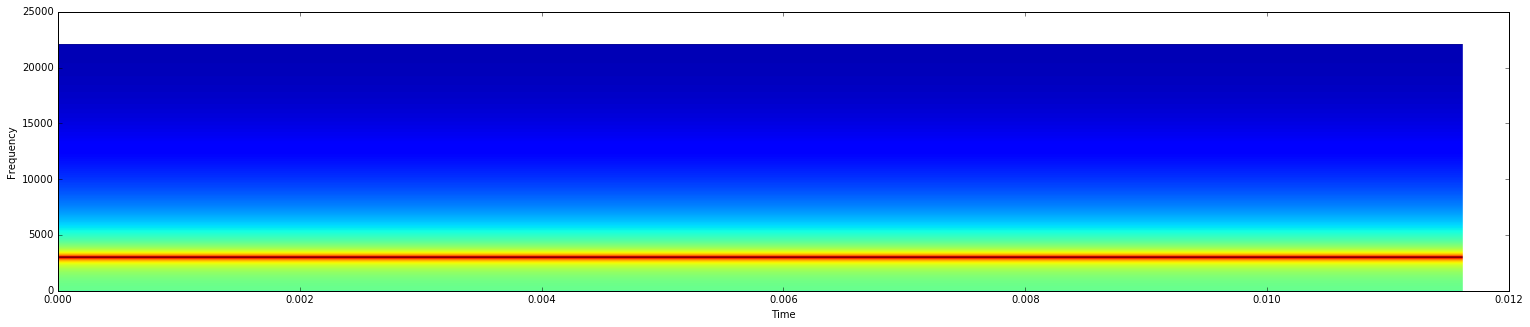

In [35]:
S, freqs, bins, im = plt.specgram(x, NFFT=1024, Fs=sr, noverlap=512)

# Plot a spectrogram
plt.xlabel('Time')
plt.ylabel('Frequency')

# we should see a red line at 3000Hz where the energy of the sound is highest

Let's listen to it too:

In [37]:
# then we can listen to our sample using the Audio function
Audio(data = x, rate = sr)

## Writing Digital Audio
Finally, we can also write any arrays we are working with as audio using *librosa.output.write_wav*  saves a NumPy array to a WAV file. 




In [38]:
# Write an array to a wav file
librosa.output.write_wav('plink.wav', x, 44100)

# try the noise example too ... 
#noise = 0.1*scipy.randn(44100)
#librosa.output.write_wav('noise.wav', noise, 44100)

# and list the files in our current directory of type 'wav'
%ls *.wav

plink.wav


Search your computer for "plink.wav" and play it from your finder/ windows explorer ... 
Learning to write audio can be useful, for example if you have extracted a segment of recording you wish to save for later close listening. 